# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [17]:
heroes_df = pd.read_csv('heroes_information.csv') 
powers_df =  pd.read_csv('super_hero_powers.csv') 
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [18]:
heroes_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [47]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     734 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [37]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
For Gender, Eye color, Race, Hair color, Publisher, Skin color, and Alignment, I'm setting the NaN values to Unknown or Other depending on which fits the column better, as it is possible that they were intentionally left blank due to the character having no gender, or eyes, or hair, but the data is still valuable. For the NaN values in Numeric columns, I set them to be equal to the dummy value in its given column (-99 in both cases) because again in some cases the value may be intentionally left blank due to a character having no weight (due to a power) or height (due to the ability to change their height) or just generally being unknown. As this data constitutes a large percentage of each of these columns, Height and Weight will be excluded from most of the data deep dives unless specifically looking at character height or weight.



In [78]:
heroes_df['Publisher'] = heroes_df['Publisher'].fillna(value = 'Unknown')
heroes_df.Weight.isna().sum()
heroes_df['Weight'] = heroes_df['Weight'].fillna(value = -99)

In [81]:
heroes_df['name'].value_counts()

Goliath             3
Spider-Man          3
Nova                2
Angel               2
Batgirl             2
Batman              2
Captain Marvel      2
Blizzard            2
Vindicator          2
Namor               2
Atlas               2
Firestorm           2
Blue Beetle         2
Black Canary        2
Atom                2
Toxin               2
Speedy              2
Genesis             1
Northstar           1
Quantum             1
Walrus              1
Emma Frost          1
Luna                1
Aquababy            1
Titan               1
Elle Bishop         1
Guy Gardner         1
Hyperion            1
Bullseye            1
Razor-Fist II       1
                   ..
Frigga              1
Apocalypse          1
Ant-Man             1
Robin V             1
Tracy Strauss       1
Red Tornado         1
Dr Manhattan        1
Black Knight III    1
Crimson Crusader    1
Stargirl            1
Warp                1
Cottonmouth         1
Moses Magnum        1
Fabian Cortez       1
Ando Masah

In [51]:
heroes_df.loc[heroes_df['Gender'] == '-', 'Gender'] = 'Other' 

In [54]:
heroes_df.loc[heroes_df['Eye color'] == '-', 'Eye color'] = 'other' 

In [58]:
heroes_df.loc[heroes_df['Race'] == '-', 'Race'] = 'Unknown' 

In [61]:
heroes_df.loc[heroes_df['Hair color'] == '-', 'Hair color'] = 'Other' 

In [65]:
heroes_df.loc[heroes_df['Skin color'] == '-', 'Skin color'] = 'other' 

In [68]:
heroes_df.loc[heroes_df['Alignment'] == '-', 'Alignment'] = 'unknown' 

In [86]:
heroes_df.loc[heroes_df['name'].duplicated(keep = False) == True]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,Unknown,Blond,183.0,Marvel Comics,other,good,68.0
23,Angel,Male,other,Vampire,Other,-99.0,Dark Horse Comics,other,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,other,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,other,bad,126.0
49,Atom,Male,blue,Unknown,Red,178.0,DC Comics,other,good,68.0
50,Atom,Male,other,Unknown,Other,-99.0,DC Comics,other,good,-99.0
62,Batgirl,Female,other,Unknown,Other,-99.0,DC Comics,other,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,other,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,other,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,other,good,77.0


In [122]:
to_remove = heroes_df.loc[(heroes_df['name'].duplicated(keep = False) == True) 
               & (heroes_df['Race'] == 'Unknown') & (heroes_df['Hair color'] == 'Other')
               & (heroes_df['name'] != "Vindicator")]
to_remove.index
heroes_df.drop(to_remove.index, axis = 0, inplace = True)

In [125]:
heroes_df.loc[(heroes_df['name'].duplicated(keep = False) == True) 
               & (heroes_df['Race'] == 'Unknown') & (heroes_df['Hair color'] == 'Other')
               & (heroes_df['name'] != "Vindicator")]
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 733
Data columns (total 10 columns):
name          728 non-null object
Gender        728 non-null object
Eye color     728 non-null object
Race          728 non-null object
Hair color    728 non-null object
Height        728 non-null float64
Publisher     728 non-null object
Skin color    728 non-null object
Alignment     728 non-null object
Weight        728 non-null float64
dtypes: float64(2), object(8)
memory usage: 62.6+ KB


In [148]:
heroes_df = heroes_df.set_index('name')
powers_df = powers_df.set_index('hero_names')

In [150]:
powers_df.loc[powers_df.index == 'Speedy']

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
Speedy,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [162]:
heroes_and_powers = heroes_df.join(powers_df, how='outer')
heroes_and_powers.loc[heroes_and_powers.Gender.isna()]

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
3-D Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,False,False,False,False,False,False,False,False,False,False
Bananaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
Bizarro-Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,False,False,False,False,False,False,False,True,False,False
Black Vulcan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
Blue Streak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
Bradley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
Clayface,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,False,False,False,False,False,False,False,False,False,False
Concrete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
Dementor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,False,False,False,False,False,False,False,False,False,False
Doctor Poison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False


In [167]:
for col in heroes_df.columns:
    heroes_and_powers.loc[heroes_and_powers[col].isna(), col] = 'Unknown'
heroes_and_powers.isna().sum()

Gender                    0
Eye color                 0
Race                      0
Hair color                0
Height                    0
Publisher                 0
Skin color                0
Alignment                 0
Weight                    0
Agility                  73
Accelerated Healing      73
Lantern Power Ring       73
Dimensional Awareness    73
Cold Resistance          73
Durability               73
Stealth                  73
Energy Absorption        73
Flight                   73
Danger Sense             73
Underwater breathing     73
Marksmanship             73
Weapons Master           73
Power Augmentation       73
Animal Attributes        73
Longevity                73
Intelligence             73
Super Strength           73
Cryokinesis              73
Telepathy                73
Energy Armor             73
                         ..
Intuitive aptitude       73
Vision - Microscopic     73
Melting                  73
Wind Control             73
Super Breath        

In [168]:
for col in powers_df.columns:
    heroes_and_powers.loc[heroes_and_powers[col].isna(), col] = 'Unknown'
heroes_and_powers.isna().sum().sum()

0

In [273]:
heroes_and_powers.loc[heroes_and_powers['Height'] == 'Unknown', 'Height'] = -99
heroes_and_powers.loc[heroes_and_powers['Weight'] == 'Unknown', 'Weight'] = -99
heroes_and_powers = heroes_and_powers.astype({'Weight': 'float64', 'Height': 'float64'})
heroes_and_powers.dtypes

Gender                    object
Eye color                 object
Race                      object
Hair color                object
Height                   float64
Publisher                 object
Skin color                object
Alignment                 object
Weight                   float64
Agility                   object
Accelerated Healing       object
Lantern Power Ring        object
Dimensional Awareness     object
Cold Resistance           object
Durability                object
Stealth                   object
Energy Absorption         object
Flight                    object
Danger Sense              object
Underwater breathing      object
Marksmanship              object
Weapons Master            object
Power Augmentation        object
Animal Attributes         object
Longevity                 object
Intelligence              object
Super Strength            object
Cryokinesis               object
Telepathy                 object
Energy Armor              object
          

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

<function matplotlib.pyplot.show(*args, **kw)>

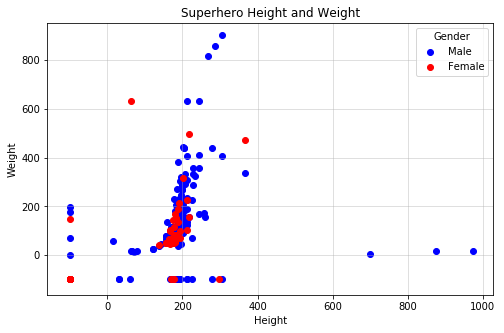

In [193]:
male_heroes = heroes_and_powers.loc[heroes_and_powers['Gender'] == 'Male']
female_heroes = heroes_and_powers.loc[heroes_and_powers['Gender'] == 'Female']

plt.figure(figsize = (8,5))
plt.grid(zorder = 0, alpha = .5)
plt.scatter(male_heroes['Height'], male_heroes['Weight'], c = 'Blue', label = 'Male', zorder = 1)
plt.scatter(female_heroes['Height'], female_heroes['Weight'], c = 'Red', label = 'Female', zorder = 2)
plt.legend(title = 'Gender')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Superhero Height and Weight")
plt.show

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [285]:
male_heroes_df =  heroes_and_powers[heroes_and_powers['Gender'] == 'Male']
female_heroes_df = heroes_and_powers[heroes_and_powers['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

C:\Users\Drew\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


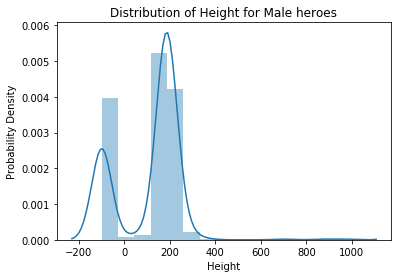

Mean height for male heroes: 109.338
Median height for male heroes: 180.0


In [286]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print("Mean height for male heroes: {}".format(male_heroes_df.Height.mean()))
print("Median height for male heroes: {}".format(male_heroes_df.Height.median()))

C:\Users\Drew\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


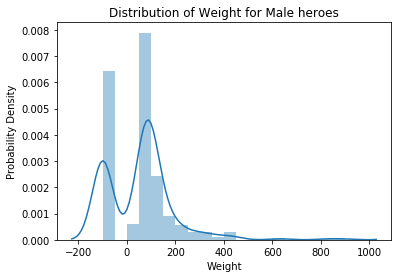

Mean weight for male heroes: 53.26
Median weight for male heroes: 79.0


In [287]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print("Mean weight for male heroes: {}".format(male_heroes_df.Weight.mean()))
print("Median weight for male heroes: {}".format(male_heroes_df.Weight.median()))

C:\Users\Drew\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


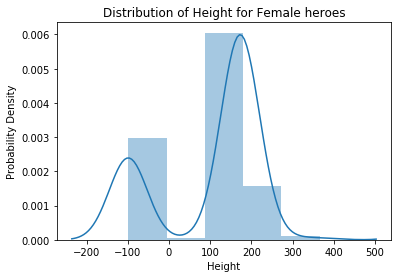

Mean height for female heroes: 99.0427135678392
Median height for female heroes: 168.0


In [288]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print("Mean height for female heroes: {}".format(female_heroes_df.Height.mean()))
print("Median height for female heroes: {}".format(female_heroes_df.Height.median()))

C:\Users\Drew\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


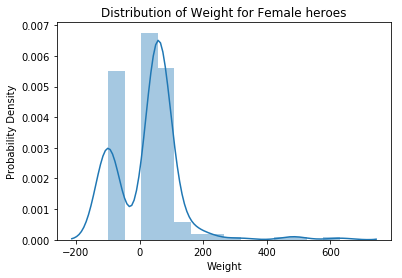

Mean weight for female heroes: 27.899497487437184
Median weight for female heroes: 79.0


In [289]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print("Mean weight for female heroes: {}".format(female_heroes_df.Weight.mean()))
print("Median weight for female heroes: {}".format(male_heroes_df.Weight.median()))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [295]:
powers = {}
for col in powers_df.columns:
    powers.update({heroes_and_powers.loc[heroes_and_powers[col] == True, col].sum(): col})
for i in sorted(powers)[-5:]:
    print(powers[i],i)

Agility 250
Super Speed 257
Durability 267
Stamina 299
Super Strength 369


In [297]:
marvel_powers = {}
for col in powers_df.columns:
    marvel_powers.update({heroes_and_powers.loc[(heroes_and_powers[col] == True) &
                         (heroes_and_powers['Publisher'] == 'Marvel Comics'), col].sum(): col})
for i in sorted(marvel_powers)[-5:]:
    print(marvel_powers[i],i)

Agility 125
Super Speed 136
Stamina 149
Durability 153
Super Strength 203


In [298]:
dc_powers = {}
for col in powers_df.columns:
    dc_powers.update({heroes_and_powers.loc[(heroes_and_powers[col] == True) &
                         (heroes_and_powers['Publisher'] == 'DC Comics'), col].sum(): col})
for i in sorted(dc_powers)[-5:]:
    print(dc_powers[i],i)

Durability 71
Super Speed 78
Flight 85
Stamina 88
Super Strength 107


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
Super Strength is the most common power across the board, with Stamina, Super Speed, and Durability being in the top 5 across the board as well. The primary difference is that Flight is one of DC's top 5 powers, as opposed to Agility for Marvel.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [299]:
female_powers = {}
for col in powers_df.columns:
    female_powers.update({heroes_and_powers.loc[(heroes_and_powers[col] == True) &
                         (heroes_and_powers['Gender'] == 'Female'), col].sum(): col})
for i in sorted(female_powers)[-5:]:
    print(female_powers[i],i)

Super Speed 58
Durability 59
Agility 66
Stamina 68
Super Strength 88


In [300]:
male_powers = {}
for col in powers_df.columns:
    male_powers.update({heroes_and_powers.loc[(heroes_and_powers[col] == True) &
                         (heroes_and_powers['Gender'] == 'Male'), col].sum(): col})
for i in sorted(male_powers)[-5:]:
    print(male_powers[i],i)

Agility 172
Super Speed 185
Durability 195
Stamina 220
Super Strength 260


<function matplotlib.pyplot.show(*args, **kw)>

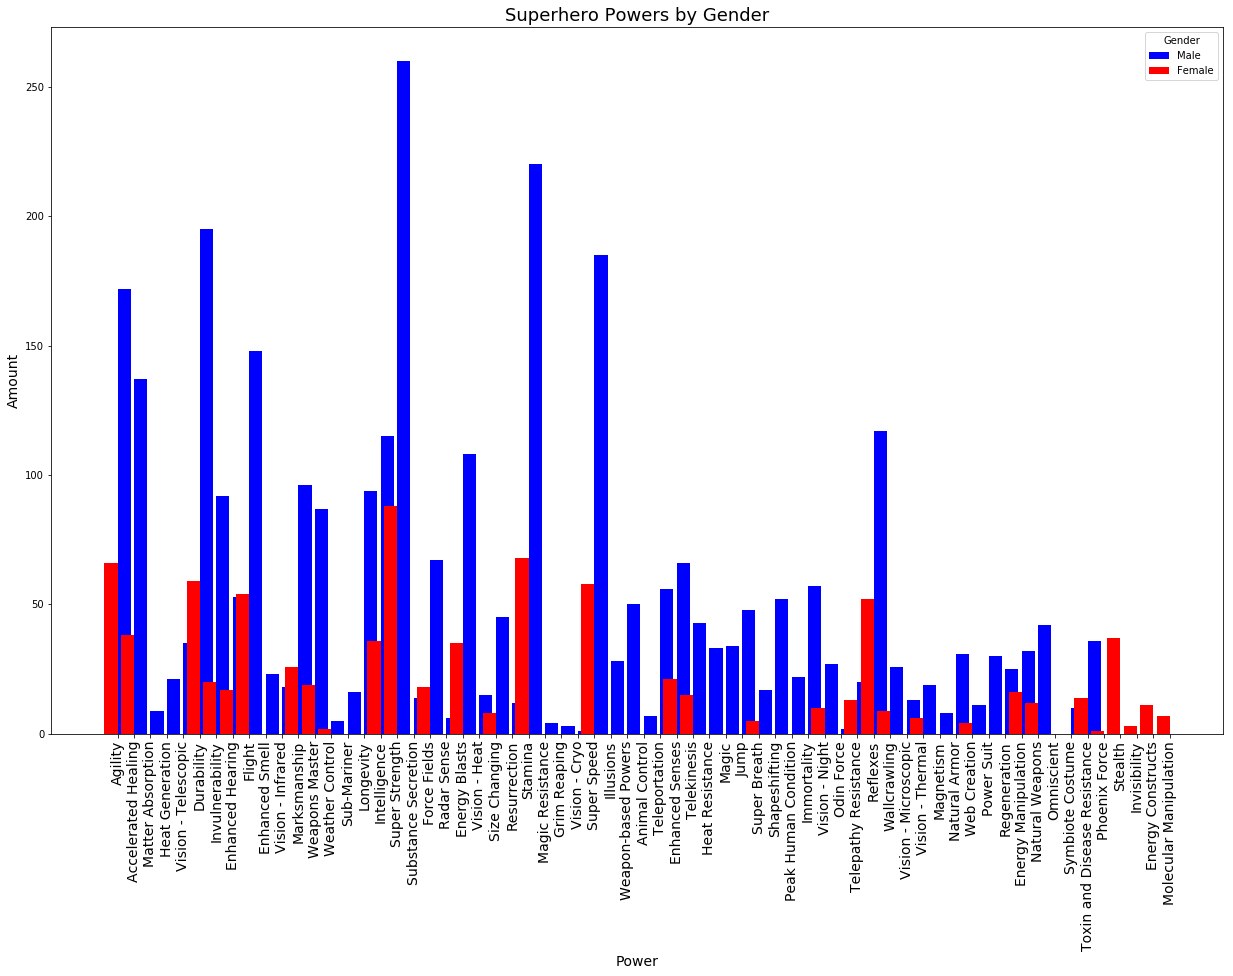

In [366]:
plt.figure(figsize = (21,13))
plt.bar(male_powers.values(), male_powers.keys(), color = 'Blue', label = 'Male', align = 'edge', width = 0.8)
plt.bar(female_powers.values(), female_powers.keys(), color = 'Red', label = 'Female', align = 'edge', width = -0.8)
plt.legend(title = 'Gender')
plt.xlabel("Power", fontsize = 14)
plt.ylabel("Amount", fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Superhero Powers by Gender", fontsize = 18)
plt.show

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data